In [1]:
#importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
import random

In [2]:
random.seed(666)

Loading the dataset, removed all the N/A narratives

In [3]:
complaints = pd.read_csv("complaints.csv")
df = complaints[['Consumer complaint narrative','Product']]
df = df.rename(columns={'Consumer complaint narrative': "narrative"})
df = df[df.narrative.notnull()]

Examining the categories

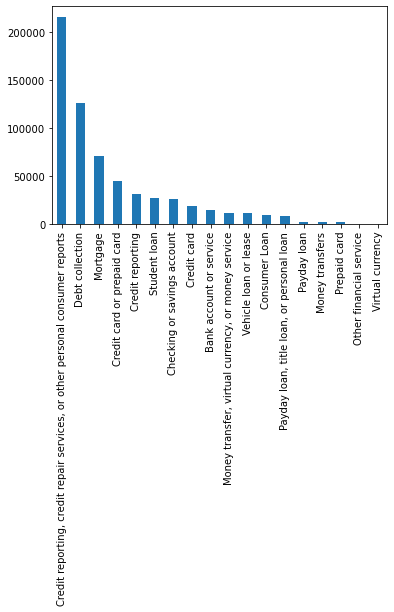

In [4]:
target = df['Product'].value_counts().sort_values(ascending=False)
target.plot.bar()

In [5]:
target.shape

(18,)

In [6]:
target

Credit reporting, credit repair services, or other personal consumer reports    216075
Debt collection                                                                 125610
Mortgage                                                                         70542
Credit card or prepaid card                                                      44636
Credit reporting                                                                 31588
Student loan                                                                     27123
Checking or savings account                                                      26013
Credit card                                                                      18838
Bank account or service                                                          14885
Money transfer, virtual currency, or money service                               11437
Vehicle loan or lease                                                            10857
Consumer Loan                              

In [7]:
df.shape

(620340, 2)

How many percent of the highest frequency category on the data set?

In [8]:
df['Product'][(df['Product']=='Credit reporting, credit repair services, or other personal consumer reports')].count()/df.shape[0]

0.3483170519392591

Creating a new feature, the count of words for every instances, and then examine it

In [9]:
df['word_count'] = df['narrative'].str.split().str.len()

What is the least and maximum number of word per narrative and what are the indices?

In [10]:
df['word_count'].idxmin()

573

In [11]:
df['word_count'].min()

1

In [12]:
df['word_count'].idxmax()

604188

In [13]:
df['word_count'].max()

6314

In [14]:
df.loc[573]

narrative     Wasapprovedfortrialmodificationwithmymortgages...
Product                                                Mortgage
word_count                                                    1
Name: 573, dtype: object

The average number of words

In [15]:
df['word_count'].mean()

193.57352097236998

Number of words distribution

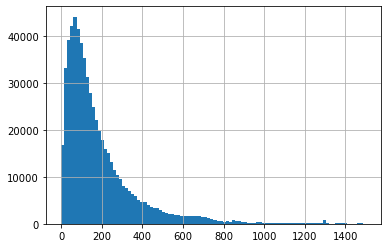

In [16]:
df['word_count'].hist(bins = 100, range=[0,1500])

In [17]:
len(df[df['word_count'] == 10])

1504

How does the narratives that has 10 or less word look?

In [18]:
one_word = df[df['word_count']==1]

In [19]:
one_word

,narrative,Product,word_count
573,Wasapprovedfortrialmodificationwithmymortgages...,Mortgage,1
14838,Throughoutthelastfewmonthswehavehadawebsite(XX...,"Money transfer, virtual currency, or money ser...",1
22007,"Ihavesent3disputeletterstobothXXXXXXXX,XXXX,Ca...","Credit reporting, credit repair services, or o...",1
26255,Ireceivedacopyofmycreditreportandthereareitems...,"Credit reporting, credit repair services, or o...",1
28204,IamtryingtodoaabalancetransferfromCapitalOneto...,Credit card or prepaid card,1
...,...,...,...
1148713,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,"Credit reporting, credit repair services, or o...",1
1160380,Iambeingsuedbytransworldsystemswhohaspartnered...,Debt collection,1
1166164,Ireceivedanegativeremarkonmycreditreport;Theac...,Debt collection,1
1419172,OcwenLetterXXXX.pdf,Mortgage,1


In [20]:
two_words = df[df['word_count']==2]

In [21]:
two_words

,narrative,Product,word_count
5260,inaccurate information,"Credit reporting, credit repair services, or o...",2
6107,Unauthorized inquiry,"Credit reporting, credit repair services, or o...",2
7335,Identity theft.,"Credit reporting, credit repair services, or o...",2
18740,Unauthorized Inquiry,"Credit reporting, credit repair services, or o...",2
19169,Unauthorized inquiry,"Credit reporting, credit repair services, or o...",2
...,...,...,...
1717901,Identity theft.,"Credit reporting, credit repair services, or o...",2
1732678,Fraudulent Inquiries.,"Credit reporting, credit repair services, or o...",2
1739066,Incorrect information,"Credit reporting, credit repair services, or o...",2
1807752,INACCURATE INFORMATION,"Credit reporting, credit repair services, or o...",2


In [22]:
three_words = df[df['word_count']==3]

In [23]:
three_words

,narrative,Product,word_count
5033,InFebrurary2019IwaslookingtopurchaseatruckandI...,"Credit reporting, credit repair services, or o...",3
7788,Fraud alert removal,"Credit reporting, credit repair services, or o...",3
9647,Fraud alert removal,"Credit reporting, credit repair services, or o...",3
24015,"AccordingtotheFairCreditReportingAct,Section60...","Credit reporting, credit repair services, or o...",3
29178,SENT FTC VIOLATION,"Credit reporting, credit repair services, or o...",3
...,...,...,...
1749180,XX/XX/2017 UNKNOWN INQUIRY,"Credit reporting, credit repair services, or o...",3
1769285,Account is fraud,"Credit reporting, credit repair services, or o...",3
1772964,XXXX Debt. Fraudulent,Student loan,3
1798402,Harassing my siblings.,Debt collection,3


In [24]:
four_words = df[df['word_count']==4]

In [25]:
four_words

,narrative,Product,word_count
5040,inaccurate information being reported,"Credit reporting, credit repair services, or o...",4
15861,My complaint was denied,Credit card or prepaid card,4
23025,REPORTING INACCURATE PERSONAL IDENTIFIERS,"Credit reporting, credit repair services, or o...",4
23434,My information is bad,"Credit reporting, credit repair services, or o...",4
24398,ftc violation acol stystems,"Credit reporting, credit repair services, or o...",4
...,...,...,...
1808935,Credit pull. Hard inquiry,"Credit reporting, credit repair services, or o...",4
1810525,"Inaccurate Information, not mine","Credit reporting, credit repair services, or o...",4
1810712,Alot of unknown inquiries,"Credit reporting, credit repair services, or o...",4
1811899,Account is not mine,Debt collection,4


In [26]:
ten_words = df[df['word_count']==10]

In [27]:
ten_words

,narrative,Product,word_count
16,i am a victim of identity theft as previously ...,"Credit reporting, credit repair services, or o...",10
1246,Would like my fraud alerts removed from my cre...,"Credit reporting, credit repair services, or o...",10
7631,Due to overwhelmed hardship I can't pay what i...,Debt collection,10
8836,XX/XX/19 Never authorized an inquiry for credi...,"Credit reporting, credit repair services, or o...",10
13263,Experian is not giving me access to my credit ...,"Credit reporting, credit repair services, or o...",10
...,...,...,...
1811154,"inaccurate information, no knowledge of accoun...","Credit reporting, credit repair services, or o...",10
1811298,You have the wrong person- I am not that person,"Credit reporting, credit repair services, or o...",10
1817183,Information incorrect and l not owe any money ...,"Credit reporting, credit repair services, or o...",10
1817814,Chase bank usa nia XX/XX/2018 unknown inquirin...,"Credit reporting, credit repair services, or o...",10


Decided to remove all of observations that has less than 9 words for their narrative

In [28]:
df = (df[df['word_count'] >= 10])

In [29]:
df

,narrative,Product,word_count
1,transworld systems inc. \nis trying to collect...,Debt collection,18
3,"Over the past 2 weeks, I have been receiving e...",Debt collection,78
6,Pioneer has committed several federal violatio...,Debt collection,152
8,"Previously, on XX/XX/XXXX, XX/XX/XXXX, and XX/...","Credit reporting, credit repair services, or o...",171
9,Hello This complaint is against the three cred...,"Credit reporting, credit repair services, or o...",428
...,...,...,...
1823677,"I made a purchase of {$500.00} on XXXX XXXX, 2...",Credit card,44
1823678,Received statements showing {$3000.00} in Savi...,Bank account or service,20
1823680,"On XXXX XXXX, 2015, I contacted XXXX XXXX, who...",Mortgage,331
1823681,I can not get from chase who services my mortg...,Mortgage,21


In [30]:
lots_of_words = (df[df['word_count'] >= 1000])

In [31]:
lots_of_words

,narrative,Product,word_count
51,We have already tried to contact the company w...,Mortgage,3755
80,Accounts added and/or created unbeknownst to m...,"Credit reporting, credit repair services, or o...",1291
92,I received an email from a XXXX XXXX along wit...,Debt collection,1551
182,Accounts added and/or created unbeknownst to m...,"Credit reporting, credit repair services, or o...",1291
202,"On XX/XX/2019, I received the letter from Bila...",Debt collection,1050
...,...,...,...
1823358,On XX/XX/18 my husband and I contacted Carmax ...,Vehicle loan or lease,1031
1823431,"XXXX XXXX XXXX XXXX XXXX, NY XXXX loan # XXXX ...",Mortgage,1107
1823626,I closed on my home in XXXX with Homebridge Fi...,Mortgage,1869
1823631,"This is a complaint against One West Bank , In...",Mortgage,1081


Creating new labels, the decision based on the CFPB report and original label from the dataset

In [32]:
df.loc[(df['Product'] == 'Credit reporting') | 
       (df['Product']=='Credit reporting, credit repair services, or other personal consumer reports'), 
       'Product'] = 'Credit or consumer reporting, credit repair services'

df.loc[(df['Product'] == 'Credit card') | 
       (df['Product']=='Credit card or prepaid card') |
       (df['Product'] == 'Prepaid card'), 
       'Product'] = 'Credit card or prepaid card'

df.loc[(df['Product'] == 'Money transfer, virtual currency, or money service') | 
       (df['Product']=='Money transfers') |
       (df['Product'] == 'Virtual currency'), 
       'Product'] = 'Money transfer or service, virtual currency'

df.loc[(df['Product'] == 'Payday loan') | 
       (df['Product']=='Payday loan, title loan, or personal loan') |
       (df['Product'] == 'Consumer Loan'), 
       'Product'] = 'Personal loan'

df.loc[(df['Product'] == 'Bank account or service') | 
       (df['Product']=='Other financial service'), 
       'Product'] = 'Other financial service'

removing 'Other financial service' category

In [33]:
df = (df[df['Product'] != 'Other financial service'])

Now I have 9 categories

In [34]:
new_target = df['Product'].value_counts().sort_values(ascending=False)
new_target

Credit or consumer reporting, credit repair services    242435
Debt collection                                         124416
Mortgage                                                 70419
Credit card or prepaid card                              64706
Student loan                                             27033
Checking or savings account                              25860
Personal loan                                            19365
Money transfer or service, virtual currency              12816
Vehicle loan or lease                                    10824
Name: Product, dtype: int64

In [35]:
df.shape

(597874, 3)

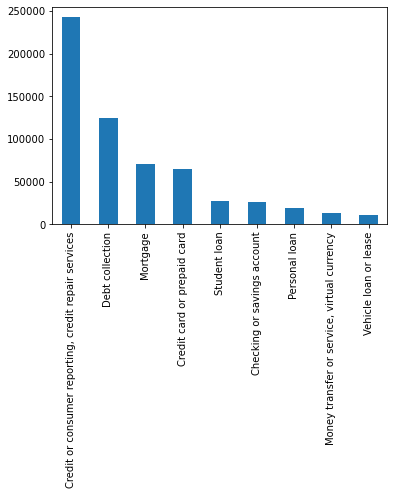

In [36]:
new_target.plot.bar()

The following codes are mostly based on https://www.kaggle.com/christofhenkel/how-to-preprocessing-when-using-embeddings
Some codes are modified for this work purposes

In [37]:
from tqdm import tqdm
tqdm.pandas()

C:\Users\virah\anaconda3\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


Function for building dictionary of vocabulary and its frequency that can be compared later to word2vec vocabulary

In [38]:
def build_vocab(sentences, verbose=True):
    """
    :param sentences: list of list of words
    :return: dictionary of words and their count
    """
    vocab = {}
    for sentence in tqdm(sentences, disable= (not verbose)):
        for word in sentence:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1
    return vocab

In [39]:
sentences = df['narrative'].progress_apply(lambda x: str(x).split()).values
vocab = build_vocab(sentences)
print({k: vocab[k] for k in list(vocab)[:5]})

100%|██████████| 597874/597874 [02:30<00:00, 3970.85it/s]


{'transworld': 65, 'systems': 3213, 'inc.': 290, 'is': 1054633, 'trying': 67193}


Load word2vec vectors

In [40]:
from gensim.models import KeyedVectors

In [41]:
vectors = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz',
                                            binary=True)

Function to check the coverage of word2vec againts the corpus vocabulary

In [42]:
import operator 

def check_coverage(vocab,embeddings_index):
    a = {}
    oov = {}
    k = 0
    i = 0
    for word in tqdm(vocab):
        try:
            a[word] = embeddings_index[word]
            k += vocab[word]
        except:
            oov[word] = vocab[word]
            i += vocab[word]
            pass

    print('Found embeddings for {:.2%} of vocab'.format(len(a) / len(vocab)))
    print('Found embeddings for  {:.2%} of all text'.format(k / (k + i)))
    sorted_x = sorted(oov.items(), key=operator.itemgetter(1))[::-1]

    return sorted_x

Check the coverage before data cleaning

In [43]:
oov = check_coverage(vocab, vectors)

100%|██████████| 432682/432682 [00:29<00:00, 14913.97it/s]


Found embeddings for 18.68% of vocab
Found embeddings for  79.65% of all text


Function to clean the text

In [44]:
import re

def clean_text(x):
    x = str(x)
    for punct in "/-'":
        x = x.replace(punct, ' ')
    for punct in '&':
        x = x.replace(punct, f' {punct} ')
    for punct in '?!.,"#$%\'()*+-/:;<=>@[\\]^_`{|}~' + '“”’':
        x = x.replace(punct, '')
    x = re.sub('[0-9]{5,}', '#####', x)
    x = re.sub('[0-9]{4}', '####', x)
    x = re.sub('[0-9]{3}', '###', x)
    x = re.sub('[0-9]{2}', '##', x)
    return x

In [45]:
pd.options.mode.chained_assignment = None

In [46]:
df['new'] = df['narrative'].progress_apply(clean_text)
sentences = df['new'].progress_apply(lambda x: str(x).split())
vocab = build_vocab(sentences)

100%|██████████| 597874/597874 [03:27<00:00, 2878.59it/s]


Check the coverage after cleaning

In [47]:
oov = check_coverage(vocab, vectors)

100%|██████████| 211466/211466 [00:38<00:00, 5507.09it/s] 

Found embeddings for 39.93% of vocab
Found embeddings for  90.09% of all text


Function to find some of the highest mispelling and fixed it

In [48]:
def _get_mispell(mispell_dict):
    mispell_re = re.compile('(%s)' % '|'.join(mispell_dict.keys()))
    return mispell_dict, mispell_re


mispell_dict = {'didnt':'did not',
                'doesnt':'does not',
                'isnt':'is not',
                'shouldnt':'should not',
                'wasnt':'was not',
                'judgement':'judgment',
                'isnt': 'is not',
                'cancelled':'canceled',
                'cancelling':'canceling',
                'hasnt':'has not',
                'dont':'do not'
                }
mispellings, mispellings_re = _get_mispell(mispell_dict)

def replace_typical_misspell(text):
    
    def replace(match):
        return mispellings[match.group(0)]

    return mispellings_re.sub(replace, text)

In [49]:
df['new'] = df['new'].progress_apply(replace_typical_misspell)
sentences = df['new'].progress_apply(lambda x: str(x).split())
vocab = build_vocab(sentences)

100%|██████████| 597874/597874 [03:42<00:00, 2691.32it/s]


In [50]:
oov = check_coverage(vocab, vectors)

100%|██████████| 211437/211437 [00:30<00:00, 7017.57it/s] 

Found embeddings for 39.93% of vocab
Found embeddings for  90.14% of all text


Remove some of the words that are not available in word2vec word embeddings

In [51]:
to_remove = ['a','to','of','and']
sentences = [[word for word in sentence if not word in to_remove] for sentence in tqdm(sentences)]
vocab = build_vocab(sentences)

100%|██████████| 597874/597874 [02:57<00:00, 3365.48it/s]


In [52]:
oov = check_coverage(vocab, vectors)

100%|██████████| 211433/211433 [00:32<00:00, 6441.78it/s] 


Found embeddings for 39.93% of vocab
Found embeddings for  99.49% of all text


In [ ]:
df.to_csv(r'new_complaints3.csv', index = False)